Inspired By https://www.youtube.com/watch?v=jztwpsIzEGc

# Table Of Contents
1. [Loading the Data](#load)
2. [Splitting The Data](#split)
3. [Architecture](#archi)
4. [Accuracy & Loss](#accuracy)
5. [Saving The Model](#save)
6. [Testing With New Data](#test)


In [2]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

##  1. Loading the Data <a name ="load"></a>

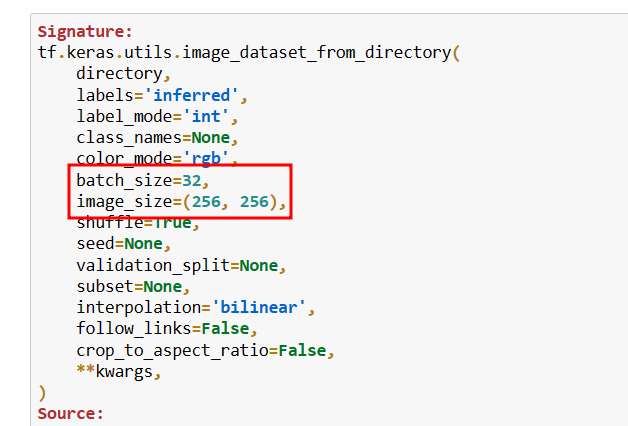
 We will be working on a batch manner on which each batch will have 32 images

In [6]:
# tf.keras.utils.image_dataset_from_directory??

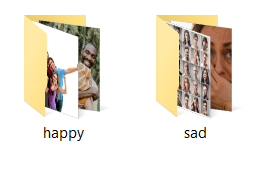
- There are 2 directories happy and sad with 153 and 152 respective photos which needs to be trained and CNN is better for it as each photo is approximately 256*256 causing a billion of parameters

In [7]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 305 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
# 32 batch image of 256*256 having 3 chanels (RGB) is taken
batch[0].shape


(32, 256, 256, 3)

In [11]:
batch

(array([[[[245.66664   , 247.49539   , 236.63148   ],
          [230.32031   , 228.83406   , 212.7811    ],
          [231.65312   , 235.1414    , 215.39804   ],
          ...,
          [189.0785    , 210.43242   , 108.21562   ],
          [190.49023   , 188.49023   , 174.20906   ],
          [194.71156   , 202.6218    , 158.36195   ]],
 
         [[252.77344   , 253.        , 250.32031   ],
          [221.46484   , 223.46484   , 184.75218   ],
          [249.22542   , 240.52658   , 242.21684   ],
          ...,
          [188.80664   , 205.5332    , 175.79411   ],
          [182.68681   , 191.92578   , 180.29837   ],
          [193.25766   , 204.53516   , 192.18352   ]],
 
         [[252.95      , 253.95      , 248.9       ],
          [234.85237   , 240.09065   , 213.43597   ],
          [245.77744   , 245.30676   , 233.52556   ],
          ...,
          [211.39452   , 210.24805   , 218.57034   ],
          [194.8297    , 201.57112   , 198.96603   ],
          [218.98828   , 216.84

In order to work with image processing
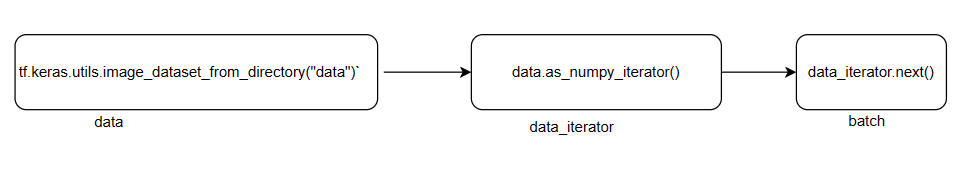


In [12]:
batch[1].shape

(32,)

In [13]:
batch[1]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

As illustrated we get the batch (tuple)
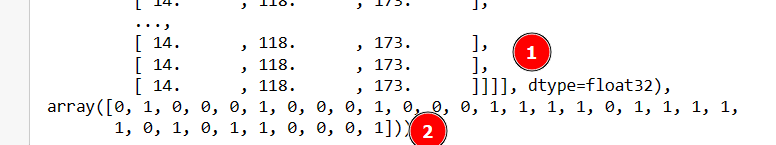
batch[0] has image's array (32) and batch[1] is label to it whether the person is sad or not (sad =1 , happy =0)

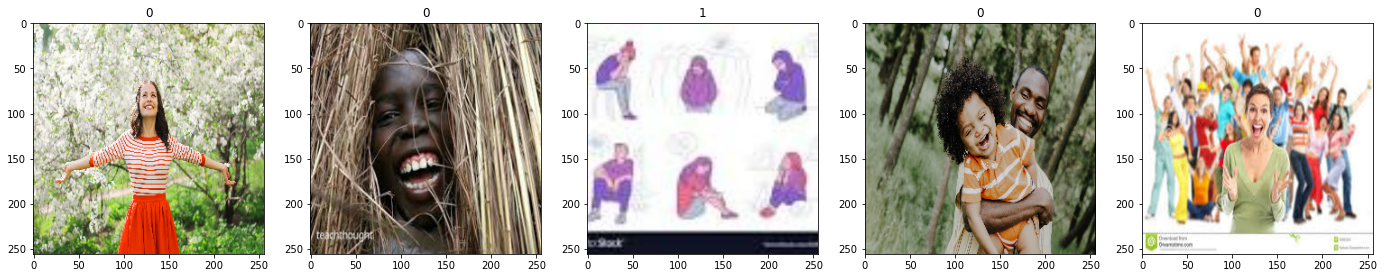

In [14]:
#Plotting the data
fig , ax = plt.subplots(ncols=5,figsize=(24,24))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

if `plt.imshow()` was used under the loop then the last indexed photo would only be shown

In [15]:
img = cv2.imread(os.path.join('data','happy','1-2.jpg'))
img.shape

(350, 590, 3)

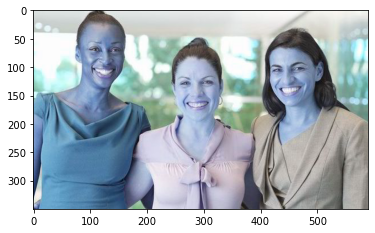

In [16]:
plt.imshow(img)

The problem with `cv2.imread()` is that it follows **BGR** policy

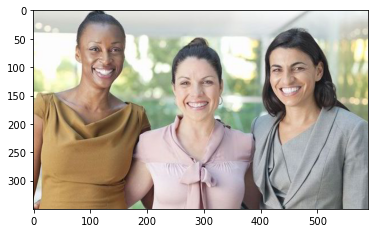

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
#Scaling and Spliting the data
data = data.map(lambda x,y : (x/255,y))

`data.map()` is used for easy access of the data

In [19]:
data.as_numpy_iterator().next()

(array([[[[7.80637264e-02, 9.37500000e-02, 9.76715684e-02],
          [5.30637242e-02, 6.87500015e-02, 7.26715699e-02],
          [3.39460783e-02, 4.96323518e-02, 5.35539202e-02],
          ...,
          [3.92156877e-02, 5.49019612e-02, 6.66666701e-02],
          [6.27451017e-02, 7.84313753e-02, 9.01960805e-02],
          [6.38480410e-02, 7.95343146e-02, 9.12990198e-02]],
 
         [[5.25735281e-02, 6.82598054e-02, 7.21813738e-02],
          [4.37499993e-02, 5.94362728e-02, 6.33578449e-02],
          [7.89215714e-02, 9.46078449e-02, 9.85294133e-02],
          ...,
          [6.94852918e-02, 8.51715654e-02, 9.69362780e-02],
          [5.31862751e-02, 6.88725486e-02, 8.06372538e-02],
          [7.68382326e-02, 9.25245062e-02, 1.04289219e-01]],
 
         [[4.75490205e-02, 6.32352978e-02, 6.71568662e-02],
          [7.76960775e-02, 9.33823511e-02, 9.73039195e-02],
          [7.75735304e-02, 9.32598040e-02, 9.71813723e-02],
          ...,
          [9.19117685e-03, 2.48774514e-02, 3.6642

In [20]:
len(data)

10

10 batch of the data can be found 32* 9 <305 so the last batch will have less images

In [21]:
data.as_numpy_iterator().next()[0].shape

(32, 256, 256, 3)

32 images of size 256*256 RGB colored in each batch

# 2. Splitting The Data <a name ="split"></a>

In [22]:
#Spliting the Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [24]:
#Working is done on the batch basis
train_batch = train.as_numpy_iterator().next()

In [80]:
train_batch[0].shape

(32, 256, 256, 3)

# 3. Architecture Of CNN <a name ="archi"></a>

In [26]:
#Architecture Of CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten


In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

- `model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))` means that **16** 3*3 filters of RGB(3) channels have stride =1 
>  $$\lfloor \frac{n-f+p}{s} +1\rfloor$$
> Here n = 256 ,f =3 ,p =0 ,s=1
>  $$\lfloor \frac{256-3}{1} +1\rfloor$$ 
>  254 is used another layer's width


In [29]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

- `model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))` means that **16** 3*3 filters of RGB(3) channels have stride =1 
>  $$\lfloor \frac{n-f+2p}{s} +1\rfloor$$
> Here n = 256 ,f =3 ,p =0 ,s=1
>  $$\lfloor \frac{256-3}{1} +1\rfloor$$ 
>  254 is used another layer's width

**Parameters**
- First parameter =
$$ ((3*3*3)+1)*16 = 448$$
- `model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))` means that **16** 3*3 filters of RGB(3) channels have stride =1 
>  $$\lfloor \frac{n-f+2p}{s} +1\rfloor$$
> Here n = 256 ,f =3 ,p =0 ,s=1
>  $$\lfloor \frac{256-3}{1} +1\rfloor$$ 
>  254 is used another layer's width

**Parameters**
- First parameter =
$$ ((3*3*3)+1)*16 = 448$$
-  For **maxpooling** 
-  $$\lfloor \frac{254}{2}\rfloor =127$$ 
- There wont be parameter for the max pooling.
## For second conv2D
`model.add(Conv2D(32,(3,3),1,activation='relu'))
`
means that **32** 3*3 filters of RGB(3) channels have stride =1 
-  $$\lfloor \frac{n-f+2p}{s} +1\rfloor$$
- Here n = 127 ,f =3 ,p =0 ,s=1
-  $$\lfloor \frac{127-3}{1} +1\rfloor$$ 
-  125 is the width and height of its output layer
-  The chanels would be 32
-  Hence, the output shape =(None,125,125,32)
**Parameters**
$$ ((f_{H}*f_{W}*n^{[C-1]})+1)*n^{[C]} $$
$$((3*3*16)+1)*32=4640$$
### For max pooling
-  $$\lfloor \frac{125}{2}\rfloor =62$$ 
## For third conv2D
`model.add(Conv2D(64,(3,3),1,activation='relu'))
`
means that **64** 3*3 filters of RGB(3) channels have stride =1 
-  $$\lfloor \frac{n-f+2p}{s} +1\rfloor$$
- Here n = 62 ,f =3 ,p =0 ,s=1
-  $$\lfloor \frac{62-3}{1} +1\rfloor$$ 
-  60 is the width and height of its output layer
-  The chanels would be 64
-  Hence, the output shape =(None,60,60,64)
**Parameters**
$$ ((f_{H}*f_{W}*n^{[C-1]})+1)*n^{[C]} $$
$$((3*3*32)+1)*64=18496$$
### For max pooling
-  $$\lfloor \frac{60}{2}\rfloor =30$$ 

## Flatten
`model.add(Flatten())`
 $$30*30*64=57600$$
## Dense
`model.add(Dense(256,activation='relu'))`
$$57600*256+256=14745856$$
## Final Dense Layer
`model.add(Dense(1,activation='sigmoid'))`
$$256*1+1=257$$
(:/fad90e67dced41f3ae0ba3dea86c3d70)
-  For **maxpooling** 
-  $$\lfloor \frac{254}{2}\rfloor =127$$ 
- There wont be parameter for the max pooling.
## For second conv2D
`model.add(Conv2D(32,(3,3),1,activation='relu'))
`
means that **32** 3*3 filters of RGB(3) channels have stride =1 
-  $$\lfloor \frac{n-f+2p}{s} +1\rfloor$$
- Here n = 127 ,f =3 ,p =0 ,s=1
-  $$\lfloor \frac{127-3}{1} +1\rfloor$$ 
-  125 is the width and height of its output layer
-  The chanels would be 32
-  Hence, the output shape =(None,125,125,32)
**Parameters**
$$ ((f_{H}*f_{W}*n^{[C-1]})+1)*n^{[C]} $$
$$((3*3*16)+1)*32=4640$$
### For max pooling
-  $$\lfloor \frac{125}{2}\rfloor =62$$ 
## For third conv2D
`model.add(Conv2D(64,(3,3),1,activation='relu'))
`
means that **64** 3*3 filters of RGB(3) channels have stride =1 
-  $$\lfloor \frac{n-f+2p}{s} +1\rfloor$$
- Here n = 62 ,f =3 ,p =0 ,s=1
-  $$\lfloor \frac{62-3}{1} +1\rfloor$$ 
-  60 is the width and height of its output layer
-  The chanels would be 64
-  Hence, the output shape =(None,60,60,64)
**Parameters**
$$ ((f_{H}*f_{W}*n^{[C-1]})+1)*n^{[C]} $$
$$((3*3*32)+1)*64=18496$$
### For max pooling
-  $$\lfloor \frac{60}{2}\rfloor =30$$ 

## Flatten
`model.add(Flatten())`
 $$30*30*64=57600$$
## Dense
`model.add(Dense(256,activation='relu'))`
$$57600*256+256=14745856$$
## Final Dense Layer
`model.add(Dense(1,activation='sigmoid'))`
$$256*1+1=257$$


In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [33]:
hist = model.fit(train,epochs =20,validation_data =val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 1.9278 - accuracy: 0.5000 - val_loss: 0.7911 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 8s 927ms/step - loss: 0.6952 - accuracy: 0.5804 - val_loss: 0.5226 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 6s 777ms/step - loss: 0.5348 - accuracy: 0.7188 - val_loss: 0.4884 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 6s 780ms/step - loss: 0.4575 - accuracy: 0.8036 - val_loss: 0.5402 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 6s 808ms/step - loss: 0.3738 - accuracy: 0.8884 - val_loss: 0.2508 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 6s 786ms/step - loss: 0.3048 - accuracy: 0.8839 - val_loss: 0.1858 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.1876 - accuracy: 0.9554 - val_loss: 0.1600 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==========

In [34]:
hist.history

{'loss': [1.9277995824813843,
  0.6951879858970642,
  0.5348192453384399,
  0.4575346112251282,
  0.3737759292125702,
  0.3048143684864044,
  0.18761011958122253,
  0.137893944978714,
  0.07091788202524185,
  0.06315624713897705,
  0.042854469269514084,
  0.04776061326265335,
  0.058307550847530365,
  0.022060751914978027,
  0.028985679149627686,
  0.014728705398738384,
  0.016438959166407585,
  0.004640803672373295,
  0.004017320927232504,
  0.0017576689133420587],
 'accuracy': [0.5,
  0.5803571343421936,
  0.71875,
  0.8035714030265808,
  0.8883928656578064,
  0.8839285969734192,
  0.9553571343421936,
  0.9553571343421936,
  0.9866071343421936,
  0.9821428656578064,
  0.9910714030265808,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808,
  1.0,
  0.9955357313156128,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.791122555732727,
  0.5226454734802246,
  0.48839902877807617,
  0.5401615500450134,
  0.25075316429138184,
  0.185776486992836,
  0.15998508036136

hist.history is really useful for plotting and further study

# 4. Accuracy And The Loss <a name ="accuracy"></a>

In [35]:
def graph_plot(var):
    plt.plot(hist.history[var],label=var)
    plt.plot(hist.history['val_'+var],label='val_'+var)
    plt.legend(loc='upper left')
    plt.title(var,fontsize=16)
    plt.show()

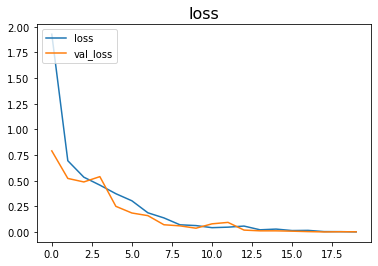

In [36]:
graph_plot('loss')

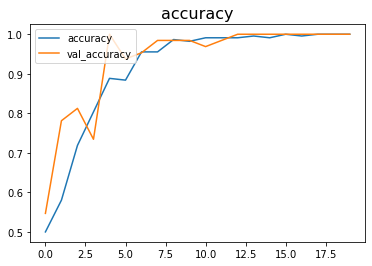

In [37]:
graph_plot('accuracy')

`plt.show()` is used to remove the function call

In [38]:
 #To measure accuracy , precision and recall

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 219ms/step


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 5. Saving The Model <a name="save"></a>

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))


In [3]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

# 6. Testing with a new image <a name="test"></a>


In [5]:
def sigmoid_predicter(yhat):
    if yhat > 0.5: 
        print(f'Why are you Sad?')
    else:
        print(f'Clap Along Happy!!!')

In [6]:
def new_image(img_name):
    img = cv2.imread(img_name)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()
    resize = tf.image.resize(img, (256,256))
    yhat = new_model.predict(np.expand_dims(resize/255, 0))
    sigmoid_predicter(yhat)

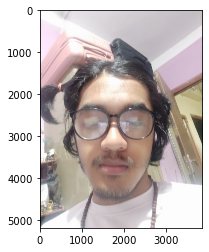

1/1 [==============================] - 0s 415ms/step
Why are you Sad?


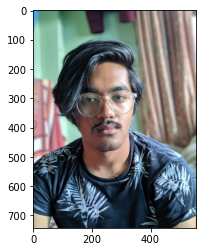

1/1 [==============================] - 0s 64ms/step
Clap Along Happy!!!


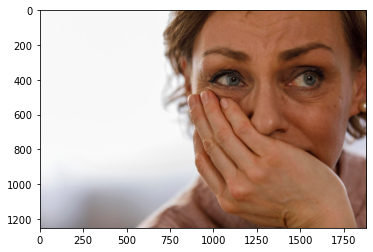

1/1 [==============================] - 0s 66ms/step
Why are you Sad?


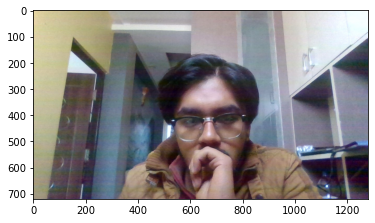

1/1 [==============================] - 0s 63ms/step
Clap Along Happy!!!


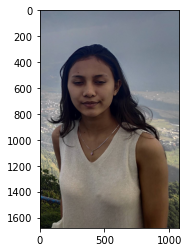

1/1 [==============================] - 0s 61ms/step
Why are you Sad?


In [8]:
for i in range(5):
    new_image(str(i)+'.jpg')